In [1]:
import numpy as np
import scipy
import scipy.misc
import filter as f
import matplotlib.pyplot as plt
import scipy.ndimage
%matplotlib inline

In [2]:
im = scipy.misc.lena();
im = np.double(im) / 255;
mf = np.ones([2,2],dtype=np.double)/4
im = f.Filt(im, mf, 0)
im = im[:,:,0]

In [3]:
k1 = np.array([[1,0,-1],[2,0,-2],[1,0,-1]],dtype=np.double)
k2 = np.array([[1,2,1],[0,0,0],[-1,-2,-1]],dtype=np.double)
k3 = np.array([[2,1,0],[1,0,-1],[0,-1,-2]],dtype=np.double)
k4 = (np.fliplr(k3)).copy();

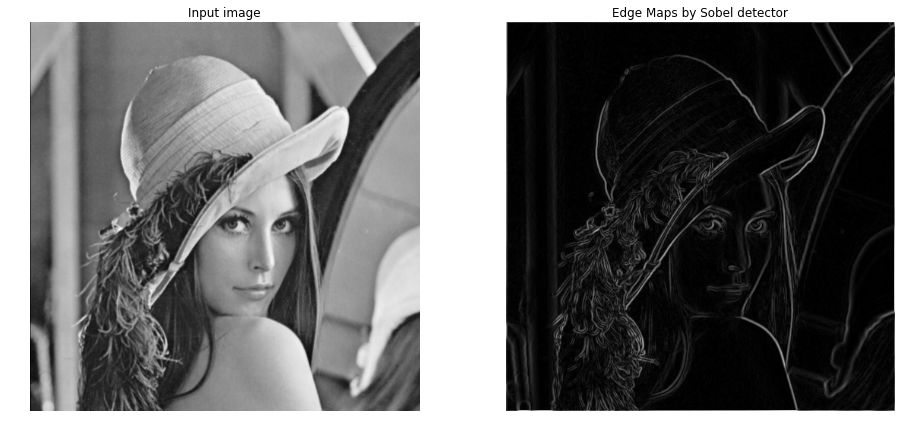

In [4]:
ed1 = f.Filt(im, k1, 0)
ed2 = f.Filt(im, k2, 0)
ed3 = f.Filt(im, k3, 0)
ed4 = f.Filt(im, k4, 0)
ed = (ed1**2 + ed2**2 + ed3**2 + ed4**2)**0.5
fig = plt.figure()
fig.set_size_inches([3,3]);
#fig.add_subplot(1,2,1)
ax1 = plt.axes([0,0,1.8,1.8]);
ax1.set_axis_off()
fig.add_axes(ax1);
plt.imshow(im, cmap='gray',aspect='auto')
plt.title('Input image')
#fig.add_subplot(1,2,2)
ax2 = plt.axes([2.2,0,1.8,1.8]);
ax2.set_axis_off()
fig.add_axes(ax2);
plt.imshow(ed[:,:,0],cmap='gray',aspect='auto');
plt.title('Edge Maps by Sobel detector')
plt.show()

In [11]:
ed_max = f.FiltMax(ed, [2,2],0);
ed_max_sup = np.double(ed > ed_max - 0.5) * np.double(ed < ed_max + 0.5) * ed

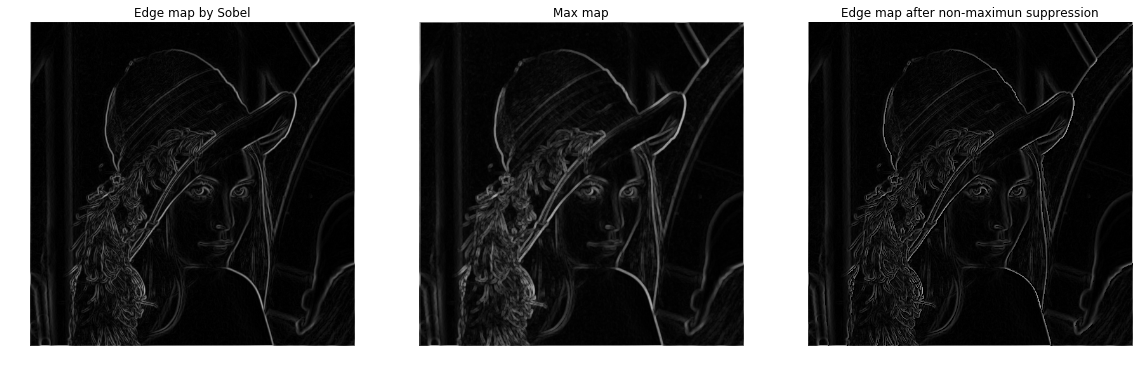

In [12]:
fig2=plt.figure()
fig2.set_size_inches([3,3]);
#fig2.add_subplot(1,3,1)
ax1 = plt.axes([0,0,1.5,1.5]);
ax1.set_axis_off()
fig2.add_axes(ax1);
plt.imshow(ed[:,:,0],cmap='gray');
plt.title('Edge map by Sobel')
#fig2.add_subplot(1,3,2)
ax2 = plt.axes([1.8,0,1.5,1.5]);
ax2.set_axis_off()
fig2.add_axes(ax2);
plt.imshow(ed_max[:,:,0],cmap='gray');
plt.title('Max map')
#fig2.add_subplot(1,3,3)
ax3 = plt.axes([3.6,0,1.5,1.5]);
ax3.set_axis_off()
fig2.add_axes(ax3);
plt.imshow(ed_max_sup[:,:,0],cmap='gray');
plt.title('Edge map after non-maximun suppression')
plt.show()
